In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('incidents_small.csv', parse_dates=['Date'])
df

C:\Users\rasto\AppData\Local\Temp\ipykernel_14556\3464779290.py:1: DtypeWarning: Columns (1,2,3,5,6,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('incidents_small.csv', parse_dates=['Date'])


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272.0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272.0,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263.0,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662.0,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740.0,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150496,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150497,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150498,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  10019 non-null  float64       
 1   Category    10019 non-null  object        
 2   Descript    10019 non-null  object        
 3   DayOfWeek   10019 non-null  object        
 4   Date        10019 non-null  datetime64[ns]
 5   Time        10019 non-null  object        
 6   PdDistrict  10019 non-null  object        
 7   Resolution  10019 non-null  object        
 8   Address     10019 non-null  object        
 9   X           10019 non-null  float64       
 10  Y           10019 non-null  float64       
 11  Location    10019 non-null  object        
 12  PdId        10019 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 14.9+ MB


In [6]:
df.dropna(inplace=True)
df.shape

(10019, 13)

In [7]:
df.sort_values(by='IncidntNum', ascending=False,inplace=True)
df.head(30)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
9554,160939676.0,ASSAULT,BATTERY,Monday,2016-11-14,09:20,NORTHERN,NONE,ELLIS ST / POLK ST,-122.419366,37.784028,"(37.7840280452032, -122.419366294797)",1.609400e+13
9986,160895846.0,OTHER OFFENSES,FALSE PERSONATION,Monday,2016-10-31,10:00,MISSION,NONE,100 Block of CAPP ST,-122.418550,37.764284,"(37.7642837095036, -122.418549940195)",1.608960e+13
9964,160893652.0,NON-CRIMINAL,"CIVIL SIDEWALKS, WARNING",Wednesday,2016-11-02,18:02,MISSION,NONE,21ST ST / SHOTWELL ST,-122.415629,37.757232,"(37.757232227914, -122.415629332446)",1.608940e+13
9963,160893464.0,WEAPON LAWS,CARRYING A CONCEALED WEAPON,Wednesday,2016-11-02,16:42,BAYVIEW,NONE,1100 Block of 18TH ST,-122.394108,37.762671,"(37.7626705352496, -122.394108177688)",1.608930e+13
9962,160893395.0,ASSAULT,BATTERY,Wednesday,2016-11-02,16:15,TARAVAL,NONE,MONTEREY BL / NORTHGATE DR,-122.461737,37.730023,"(37.7300233378439, -122.461736679015)",1.608930e+13
9953,160892842.0,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2016-11-02,10:00,MISSION,NONE,200 Block of 14TH ST,-122.418885,37.768285,"(37.7682847825555, -122.418885184858)",1.608930e+13
9952,160892836.0,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,2016-10-18,10:00,CENTRAL,NONE,VALLEJO ST / MASON ST,-122.412099,37.798166,"(37.7981663310688, -122.412098601225)",1.608930e+13
9951,160892820.0,ASSAULT,THREATS AGAINST LIFE,Wednesday,2016-11-02,11:45,PARK,NONE,STANYAN ST / WALLER ST,-122.453355,37.768246,"(37.7682463076665, -122.453354647469)",1.608930e+13
9950,160892814.0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,2016-11-02,12:10,BAYVIEW,"ARREST, BOOKED",QUESADA AV / 3RD ST,-122.391246,37.733225,"(37.7332252032804, -122.391245623019)",1.608930e+13
9945,160892591.0,ASSAULT,THREATS AGAINST LIFE,Wednesday,2016-11-02,10:19,BAYVIEW,NONE,0 Block of CASHMERE ST,-122.382705,37.735886,"(37.7358858148594, -122.382705072801)",1.608930e+13


In [8]:
df.sort_values(by=['Date','IncidntNum'],ascending=False,inplace=True)
df.head(30)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,WARRANTS,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
117,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
116,150480366.0,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
5332,160220970.0,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,2016-11-18,12:00,BAYVIEW,NONE,1200 Block of DEHARO ST,-122.400632,37.753965,"(37.7539653995399, -122.4006319548)",1.602210e+13
9554,160939676.0,ASSAULT,BATTERY,Monday,2016-11-14,09:20,NORTHERN,NONE,ELLIS ST / POLK ST,-122.419366,37.784028,"(37.7840280452032, -122.419366294797)",1.609400e+13
9964,160893652.0,NON-CRIMINAL,"CIVIL SIDEWALKS, WARNING",Wednesday,2016-11-02,18:02,MISSION,NONE,21ST ST / SHOTWELL ST,-122.415629,37.757232,"(37.757232227914, -122.415629332446)",1.608940e+13
9963,160893464.0,WEAPON LAWS,CARRYING A CONCEALED WEAPON,Wednesday,2016-11-02,16:42,BAYVIEW,NONE,1100 Block of 18TH ST,-122.394108,37.762671,"(37.7626705352496, -122.394108177688)",1.608930e+13
9962,160893395.0,ASSAULT,BATTERY,Wednesday,2016-11-02,16:15,TARAVAL,NONE,MONTEREY BL / NORTHGATE DR,-122.461737,37.730023,"(37.7300233378439, -122.461736679015)",1.608930e+13


In [9]:
df.Category.value_counts()

LARCENY/THEFT                  1566
OTHER OFFENSES                 1476
NON-CRIMINAL                   1242
ASSAULT                        1075
WARRANTS                        555
VEHICLE THEFT                   529
VANDALISM                       475
BURGLARY                        458
SUSPICIOUS OCC                  443
DRUG/NARCOTIC                   396
MISSING PERSON                  364
ROBBERY                         268
FRAUD                           188
SECONDARY CODES                 146
TRESPASS                        146
WEAPON LAWS                     141
RECOVERED VEHICLE                77
SEX OFFENSES, FORCIBLE           74
PROSTITUTION                     59
STOLEN PROPERTY                  55
DRUNKENNESS                      51
FORGERY/COUNTERFEITING           48
DISORDERLY CONDUCT               45
DRIVING UNDER THE INFLUENCE      32
ARSON                            28
KIDNAPPING                       22
RUNAWAY                          13
BRIBERY                     

In [11]:
category_count = df.Category.value_counts().reset_index()
category_count.columns = ['Category','Case count']
category_count

,Category,Case count
0,LARCENY/THEFT,1566
1,OTHER OFFENSES,1476
2,NON-CRIMINAL,1242
3,ASSAULT,1075
4,WARRANTS,555
5,VEHICLE THEFT,529
6,VANDALISM,475
7,BURGLARY,458
8,SUSPICIOUS OCC,443
9,DRUG/NARCOTIC,396


In [12]:
category_count_top_10 = category_count.head(10)
px.pie(category_count_top_10,'Category','Case count')

find the most common way of handling indicents by the PD , in SanFrancisco using visualization

In [24]:
Resolution_count = df.Resolution.value_counts().reset_index()
Resolution_count.columns = ['Resolution','Case count']
Resolution_count

,Resolution,Case count
0,NONE,6390
1,"ARREST, BOOKED",3356
2,UNFOUNDED,159
3,JUVENILE BOOKED,56
4,EXCEPTIONAL CLEARANCE,28
5,"ARREST, CITED",18
6,CLEARED-CONTACT JUVENILE FOR MORE INFO,5
7,LOCATED,3
8,NOT PROSECUTED,1
9,COMPLAINANT REFUSES TO PROSECUTE,1


<AxesSubplot: >

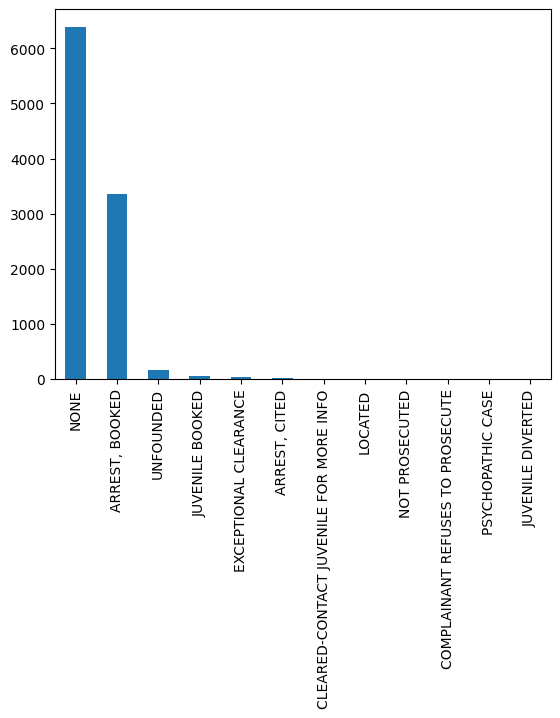

In [23]:
df.Resolution.value_counts().plot.bar()

In [25]:
Resolution_top_10 = Resolution_count.head(10)
px.pie(Resolution_top_10,'Resolution','Case count')


In [13]:
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,WARRANTS,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
117,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13


In [20]:
# get only nov entry
df[df.Date.dt.month == 11].Category.value_counts()

ASSAULT           5
FRAUD             1
NON-CRIMINAL      1
WEAPON LAWS       1
SUSPICIOUS OCC    1
OTHER OFFENSES    1
VANDALISM         1
BURGLARY          1
WARRANTS          1
Name: Category, dtype: int64

In [21]:
df[df.Date.dt.weekday == 4].Category.value_counts()

LARCENY/THEFT                  286
OTHER OFFENSES                 233
NON-CRIMINAL                   202
ASSAULT                        161
WARRANTS                        93
VEHICLE THEFT                   80
BURGLARY                        77
SUSPICIOUS OCC                  71
VANDALISM                       66
MISSING PERSON                  59
DRUG/NARCOTIC                   53
ROBBERY                         52
FRAUD                           29
TRESPASS                        25
WEAPON LAWS                     23
SECONDARY CODES                 16
STOLEN PROPERTY                 14
RECOVERED VEHICLE               12
SEX OFFENSES, FORCIBLE          12
PROSTITUTION                    10
DRUNKENNESS                      8
ARSON                            7
FORGERY/COUNTERFEITING           7
DRIVING UNDER THE INFLUENCE      6
KIDNAPPING                       4
DISORDERLY CONDUCT               3
BRIBERY                          2
EXTORTION                        1
FAMILY OFFENSES     

group incident categories by month

In [30]:
month_wise_cases = df.groupby(df.Date.dt.month)['Category'].count().reset_index()
month_wise_cases.columns = ['Month',"Case count"]
month_wise_cases

,Month,Case count
0,1,2097
1,2,2387
2,3,3361
3,4,1334
4,5,82
5,6,111
6,7,149
7,8,160
8,9,138
9,10,182


In [ ]:
#def num_to_months(num):
    if num == 1:
        return = 'January'
    elif num == 2:
        return = 'February'
    elif num == 3:
        return = 'March'
    elif num == 4:
        return = 'April'
    elif num == 5:
        return = 'May'
    elif num == 6:
        return = 'June'
    elif num == 7:
        return = 'July'
    elif num == 8:
        return = 'August'
    elif num == 9:
        return = 'September'
    elif num == 10:
        return = 'October'
    elif num == 11:
        return = 'November'
    else:
        return = 'December'

In [32]:
def num_to_months(num):
    months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    return months[num-1]

In [33]:
month_wise_cases['Month']= month_wise_cases['Month'].apply(num_to_months)

In [34]:
px.bar(month_wise_cases,'Month','Case count')